In [1]:
!date

Wed Jun 12 17:13:33 PDT 2019


# Figure 1b and 1d

In [21]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve
from upsetplot import generate_data, plot, from_memberships
from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [2]:
v2_names = np.array(['SRR8599150_v2',
       'heart1k_v2', 'SRR8611943_v2',
       'SRR8257100_v2', 'EMTAB7320_v2',
       'SRR7299563_v2', 'SRR8513910_v2',
       'SRR8639063_v2', 'SRR8524760_v2',
       'SRR6956073_v2', 'hgmm1k_v2',
       'SRR8206317_v2', 'SRR8327928_v2',
       'SRR6998058_v2'], dtype=object)

v3_names = np.array(['pbmc_1k_v3', 'hgmm10k_v3',
       'neuron_10k_v3', 'pbmc_10k_v3',
       'heart1k_v3', 'hgmm1k_v3'], dtype=object)

In [3]:
v2_data = {}
v2_data["EMTAB7320_v2"]  = {"n_reads": 335147976}
v2_data["heart1k_v2"]  = {"n_reads": 88872840}
v2_data["hgmm1k_v2"] = {"n_reads": 75225120}
v2_data["SRR6956073_v2"] = {"n_reads": 161274652}
v2_data["SRR6998058_v2"] = {"n_reads": 37227612}
v2_data["SRR7299563_v2"]  = {"n_reads": 112176350}
v2_data["SRR8206317_v2"] = {"n_reads": 85992089}
v2_data["SRR8257100_v2"]  = {"n_reads": 189337914}
v2_data["SRR8327928_v2"] = {"n_reads": 190094560}
v2_data["SRR8513910_v2"]  = {"n_reads": 146617182}
v2_data["SRR8524760_v2"]  = {"n_reads": 97106426}
v2_data["SRR8599150_v2"]  = {"n_reads": 8860361}
v2_data["SRR8611943_v2"]  = {"n_reads": 21574502}
v2_data["SRR8639063_v2"]  = {"n_reads": 416437344}

v2_data["EMTAB7320_v2"]["n_cells"] = 4510
v2_data["heart1k_v2"]["n_cells"] = 712
v2_data["hgmm1k_v2"]["n_cells"] = 1079
v2_data["SRR6956073_v2"]["n_cells"] = 4168
v2_data["SRR6998058_v2"]["n_cells"] = 575
v2_data["SRR7299563_v2"]["n_cells"] = 1660
v2_data["SRR8206317_v2"]["n_cells"] = 4418
v2_data["SRR8257100_v2"]["n_cells"] = 11685
v2_data["SRR8327928_v2"]["n_cells"] = 10396
v2_data["SRR8513910_v2"]["n_cells"] = 726
v2_data["SRR8524760_v2"]["n_cells"] = 3064
v2_data["SRR8599150_v2"]["n_cells"] = 3949
v2_data["SRR8611943_v2"]["n_cells"] = 5194
v2_data["SRR8639063_v2"]["n_cells"] = 6614

In [4]:
v3_data = {}
v3_data["hgmm1k_v3"] = {"n_reads": 63105786}
v3_data["neuron_10k_v3"] = {"n_reads": 357111595}
v3_data["pbmc_10k_v3"] = {"n_reads": 638901019}
v3_data["pbmc_1k_v3"] = {"n_reads": 66601887}
v3_data["heart1k_v3"] = {"n_reads": 84512390}
v3_data["hgmm10k_v3"] = {"n_reads": 721180737}

v3_data["hgmm1k_v3"]["n_cells"] = 1011
v3_data["neuron_10k_v3"]["n_cells"] = 11477
v3_data["pbmc_10k_v3"]["n_cells"] = 1045
v3_data["pbmc_1k_v3"]["n_cells"] = 11790
v3_data["heart1k_v3"]["n_cells"] = 11692
v3_data["hgmm10k_v3"]["n_cells"] = 1227

In [5]:
w = 67365891
c = 345420
u = 2013414

v2_data["heart1k_v2"]["barcode_error_correction"] = (w, c, u)


w = 57345535
c = 176786
u = 1849405
v3_data["heart1k_v3"]["barcode_error_correction"] = (w, c, u)


w = 58523823
c = 358110
u = 2035210
v2_data["hgmm1k_v2"]["barcode_error_correction"] = (w, c, u)



w = 46243317
c = 132278
u = 1394347
v3_data["hgmm1k_v3"]["barcode_error_correction"] = (w, c, u)




w = 499346666
c = 2613284
u = 20298095
v3_data["hgmm10k_v3"]["barcode_error_correction"] = (w, c, u)



w = 227709973
c = 659929
u = 7299697
v3_data["neuron_10k_v3"]["barcode_error_correction"] = (w, c, u)




w = 353379492
c = 1912254
u = 14819352
v3_data["pbmc_10k_v3"]["barcode_error_correction"] = (w, c, u)


w = 39178903
c = 190366
u = 1538993
v3_data["pbmc_1k_v3"]["barcode_error_correction"] = (w, c, u)



w = 28344188
c = 231718
u = 625557
v2_data["SRR6998058_v2"]["barcode_error_correction"] = (w, c, u)



w = 66294966
c = 782287
u = 1728840
v2_data["SRR8206317_v2"]["barcode_error_correction"] = (w, c, u)



w = 111254198
c = 1567548
u = 4904318
v2_data["SRR8327928_v2"]["barcode_error_correction"] = (w, c, u)



w = 348557155
c = 1857224
u = 1836077
v2_data["SRR8639063_v2"]["barcode_error_correction"] = (w, c, u)



w = 258864227
c = 4111830
u = 9256167
v2_data["EMTAB7320_v2"]["barcode_error_correction"] = (w, c, u)




w = 107572180
c = 1082195
u = 2639035
v2_data["SRR6956073_v2"]["barcode_error_correction"] = (w, c, u)



w = 64690144
c = 477618
u = 1520183
v2_data["SRR7299563_v2"]["barcode_error_correction"] = (w, c, u)




w = 173540630
c = 1094514
u = 4191648
v2_data["SRR8257100_v2"]["barcode_error_correction"] = (w, c, u)



w = 131004911
c = 910116
u = 3772762
v2_data["SRR8513910_v2"]["barcode_error_correction"] = (w, c, u)




w = 3420063
c = 38493
u = 117197
v2_data["SRR8599150_v2"]["barcode_error_correction"] = (w, c, u)




w = 16021922
c = 206410
u = 518515
v2_data["SRR8611943_v2"]["barcode_error_correction"] = (w, c, u)




w = 68514365
c = 615351
u = 1748491
v2_data["SRR8524760_v2"]["barcode_error_correction"] = (w, c, u)


In [ ]:
%%time
for f in glob.glob("/home/sina/projects/bus/validate/all_bus/k*"):
    name = "_".join(f.split("/")[7].split("_")[1:])
    print(name)
    if "v2" in name:
        # loss counts
        v2_data[name]["loss_ratio"] = pd.read_csv(f + "/lossratio.txt", header=None).values.flatten()
        
    elif "v3" in name:
        v3_data[name]["loss_ratio"] = pd.read_csv(f + "/lossratio.txt", header=None).values.flatten()


pbmc_1k_v3
SRR8599150_v2
heart1k_v2
SRR8611943_v2
hgmm10k_v3
neuron_10k_v3
SRR8257100_v2
EMTAB7320_v2
SRR7299563_v2
SRR8513910_v2
SRR8639063_v2


# Figure 1b

In [16]:
# (inwhitelist, correct, uncorrected)
w = [v2_data[i]["barcode_error_correction"][0]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[w.append(v3_data[i]["barcode_error_correction"][0]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

c = [v2_data[i]["barcode_error_correction"][1]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[c.append(v3_data[i]["barcode_error_correction"][1]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

u = [v2_data[i]["barcode_error_correction"][2]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[u.append(v3_data[i]["barcode_error_correction"][2]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

[None, None, None, None, None, None]

In [19]:
nreads = [v2_data[i]["n_reads"] for i in v2_names]
[nreads.append(v3_data[i]["n_reads"]) for i in v3_names]

idx_sorted = np.argsort(nreads)
names = v2_names 
n3 = v3_names
names = np.append(names, n3)
names = names[idx_sorted]


sorted_nreads = np.sort(nreads)

w = np.array(w)[idx_sorted]
c = np.array(c)[idx_sorted]
u = np.array(u)[idx_sorted]

data = [w, c, u]
p = data[1]/(16*data[0] + data[1])

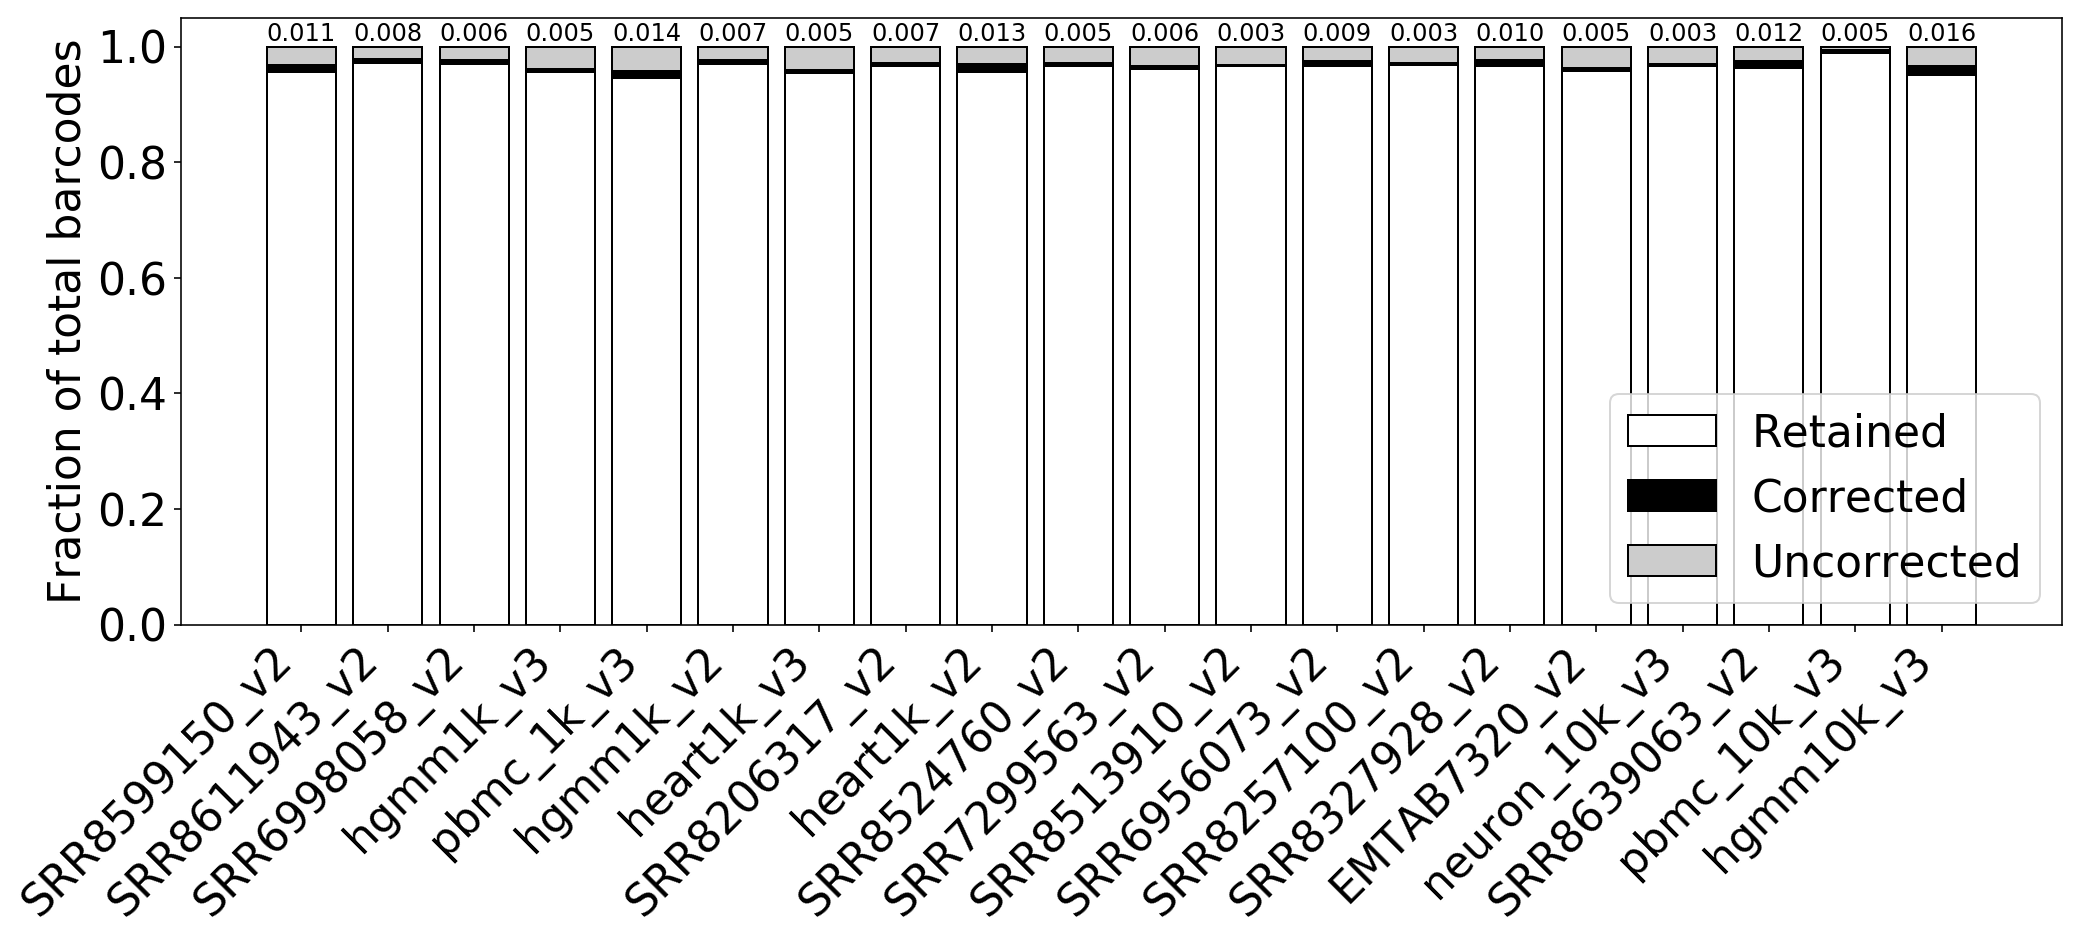

In [22]:
fig, ax=plt.subplots(figsize=(15, 7))
width=0.8

p1 = ax.bar(names, data[0], width, color='white', label="Retained", edgecolor="black")
p2 = ax.bar(names, data[1], width, bottom=data[0], color='black', label="Corrected", edgecolor="black")
p3 = ax.bar(names, data[2], width, 
                 bottom=np.array(data[0])+np.array(data[1]), color='#cccccc', label="Uncorrected", edgecolor="black")
plt.xticks(rotation=45, ha="right")

xlocs, xlabs = plt.xticks()
for i, v in enumerate(["{:.3f}".format(i) for i in 16*p*(1-p)**15]):
    plt.text(xlocs[i]-0.4, 1 + 0.01, str(v), size=12)

ax.set_ylim(bottom=0)
plt.ylabel("Fraction of total barcodes")
plt.legend(loc="lower right")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.tight_layout()
#plt.savefig("barcodecorrection.pdf")
plt.show()

### Data from Figure 1

In [23]:
for i in range(len(names)):
    print(p[i], names[i])

0.0007029465078580609 SRR8599150_v2
0.0005106859668839463 SRR8611943_v2
0.0003940297471424041 SRR6998058_v2
0.00032698094377725875 hgmm1k_v3
0.0008798369193879135 pbmc_1k_v3
0.0004612349698473498 hgmm1k_v2
0.0003380939474722988 heart1k_v3
0.0004340109240798901 SRR8206317_v2
0.00080453805456423 heart1k_v2
0.00032036737506866027 SRR8524760_v2
0.0003822942075884642 SRR7299563_v2
0.00019263917418652586 SRR8513910_v2
0.0005610190071025255 SRR6956073_v2
0.00017874793072967027 SRR8257100_v2
0.0006283658711736884 SRR8327928_v2
0.0003035884629647799 EMTAB7320_v2
0.0001810991956940125 neuron_10k_v3
0.0007369625204656871 SRR8639063_v2
0.0003329091238252972 pbmc_10k_v3
0.0009917728026873924 hgmm10k_v3


In [24]:
p.mean()

0.00048310618262500276

In [25]:
(16*p*(1-p)**15).mean()

0.007661104923636433

In [26]:
(120*p**2*(1-p)**14).mean()*100

0.003413136191418191

In [27]:
w = [v2_data[i]["barcode_error_correction"][0] for i in v2_names]
[w.append(i) for i in [v3_data[i]["barcode_error_correction"][0] for i in v3_names]]
w = np.array(w)

b = [v2_data[i]["barcode_error_correction"][1] for i in v2_names]
[b.append(i) for i in [v3_data[i]["barcode_error_correction"][1] for i in v3_names]]
b = np.array(b)

g = [v2_data[i]["barcode_error_correction"][2] for i in v2_names]
[g.append(i) for i in [v3_data[i]["barcode_error_correction"][2] for i in v3_names]]
g = np.array(g)

t = w+b+g

In [28]:
w/(1-(p)**16)

array([3.42006300e+06, 6.73658910e+07, 1.60219220e+07, 1.73540630e+08,
       2.58864227e+08, 6.46901440e+07, 1.31004911e+08, 3.48557155e+08,
       6.85143650e+07, 1.07572180e+08, 5.85238230e+07, 6.62949660e+07,
       1.11254198e+08, 2.83441880e+07, 3.91789030e+07, 4.99346666e+08,
       2.27709973e+08, 3.53379492e+08, 5.73455350e+07, 4.62433170e+07])

In [29]:
t

array([  3575753,  69724725,  16746847, 178826792, 272232224,  66687945,
       135687789, 352250456,  70878207, 111293410,  60917143,  68806093,
       117726064,  29201463,  40908262, 522258045, 235669599, 370111098,
        59371726,  47769942])

In [30]:
b/w/(1-(p)**16)

array([0.01125506, 0.00512752, 0.01288297, 0.00630696, 0.01588412,
       0.00738316, 0.00694719, 0.00532832, 0.00898134, 0.01006018,
       0.00611905, 0.0118001 , 0.01408979, 0.00817515, 0.00485889,
       0.00523341, 0.00289811, 0.00541133, 0.00308282, 0.00286048])

In [31]:
16*p*(1-p)**15

array([0.01112913, 0.00810861, 0.00626732, 0.00520609, 0.01389274,
       0.00732887, 0.00538213, 0.0068991 , 0.01271813, 0.0051013 ,
       0.00608173, 0.00307333, 0.00890106, 0.00285231, 0.00995951,
       0.00483534, 0.00288973, 0.01166172, 0.00530001, 0.01563393])

In [32]:
10*p*(1-p)**9*100

array([0.69851179, 0.50834355, 0.39263461, 0.32601995, 0.87289437,
       0.45932386, 0.33706657, 0.43231857, 0.79873123, 0.31944484,
       0.38098088, 0.19230544, 0.55819267, 0.17846058, 0.6248212 ,
       0.30275998, 0.18080424, 0.73208888, 0.33191299, 0.98295532])

In [33]:
(c/(w+c+u)*100).mean()

2.582327839771445e-08

# Figure 1d

In [ ]:
data = [v2_data[i]["loss_ratio"] for i in v2_names]
[data.append(v3_data[i]["loss_ratio"]) for i in v3_names]

names = v2_names 
n3 = v3_names
names = np.append(names, n3)

nreads = [v2_data[i]["n_reads"] for i in v2_names]
[nreads.append(v3_data[i]["n_reads"]) for i in v3_names]

idx_sorted = np.argsort(nreads)
sorted_nreads = np.sort(nreads)

data = np.array(data)[idx_sorted]

names = names[idx_sorted]

In [ ]:
kallisto_color_v2 = '#cccccc'
kallisto_color_v3 = 'black'


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_ylim(0, 1)
    #ax.set_xlabel('Sample name')

fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)


################
parts = ax.violinplot(data, showmeans=False, showmedians=False,showextrema=False)


for pc_i in range(len(parts['bodies'])):
    if "v2" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    elif "v3" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    parts['bodies'][pc_i].set_edgecolor('black')
    parts['bodies'][pc_i].set_alpha(1)

# set style for the axes
set_axis_style(ax, names)

inset = inset_axes(ax, width="50%", height="50%", loc=1)

parts = inset.violinplot(data, showmeans=False, showmedians=False,showextrema=False)

for pc_i in range(len(parts['bodies'])):
    if "v2" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v2)
    elif "v3" in names[pc_i]:
        parts['bodies'][pc_i].set_facecolor(kallisto_color_v3)
    parts['bodies'][pc_i].set_edgecolor('black')
    parts['bodies'][pc_i].set_alpha(1)

    
set_axis_style(inset, names)

inset.set_xticklabels([])
inset.set_ylim(0, 0.001)


ticks = ax.get_yticks().tolist()
ticks = ["{:.1f}".format(i) for i in ticks]
ticks[0] = "No counts lost 0.0"
ticks[-1] = "All counts lost 1.0"

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45, ha="right")

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")


grey_patch = mpatches.Patch(color=kallisto_color_v2, label='v2 Chemistry')
black_patch = mpatches.Patch(color=kallisto_color_v3, label='v3 Chemistry')

ax.figure.legend(handles=[grey_patch, black_patch], loc=1, bbox_to_anchor=(0.34,0.94))

ax.yaxis.set_ticklabels(ticks)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.tight_layout()
plt.savefig("lossratio.pdf")
plt.show()

### Data from Figure 1

In [ ]:
loss2 = [v2_data[i]["loss_ratio"] for i in v2_names]
loss3 = [v3_data[i]["loss_ratio"] for i in v3_names]

In [ ]:
for i in range(len(v2_names)):
    print("{:,.4f}% \t {}".format(loss2[i].mean()*100, v2_names[i]))

In [ ]:
for i in range(len(v3_names)):
    print("{:,.4f}% \t {}".format(loss3[i].mean(), v3_names[i]))

In [ ]:
(np.array([loss2[i].mean() for i in range(len(loss2))])).mean()*100

In [ ]:
(np.array([loss3[i].mean() for i in range(len(loss3))])).mean()*100

In [307]:
print("Number of Reads per Cell")
print("------------------------")
for i in v2_names:
    print("{:,.0f} \t {}".format(v2_data[i]["n_reads"]/v2_data[i]["n_cells"], i))

Number of Reads per Cell
------------------------
2,244 	 SRR8599150_v2
12,395 	 SRR7692543_v2
124,821 	 heart1k_v2
4,154 	 SRR8611943_v2
16,204 	 SRR8257100_v2
74,312 	 EMTAB7320_v2
67,576 	 SRR7299563_v2
201,952 	 SRR8513910_v2
62,963 	 SRR8639063_v2
31,693 	 SRR8524760_v2
38,694 	 SRR6956073_v2
69,717 	 hgmm1k_v2
19,464 	 SRR8206317_v2
18,285 	 SRR8327928_v2
64,744 	 SRR6998058_v2


In [308]:
print("Number of Reads per Cell")
print("------------------------")
for i in v3_names:
    print("{:,.0f} \t {}".format(v3_data[i]["n_reads"]/v3_data[i]["n_cells"], i))

Number of Reads per Cell
------------------------
54,280 	 pbmc_1k_v3
62,837 	 hgmm10k_v3
30,289 	 neuron_10k_v3
54,644 	 pbmc_10k_v3
83,593 	 heart1k_v3
60,388 	 hgmm1k_v3
